In [1]:
# importing packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing all algorithm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
#import lightgbm as lgb
from imblearn.over_sampling import SMOTE
#from lightgbm import LGBMClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
#EDA fucntion from previous work
def expl_data_analisys(source_frame):

    display(source_frame)
    source_frame.info()
    print()


    print ('\033[1m' + 'Null data amount' + '\033[0m')
    print()
    print(source_frame.isna().mean().sort_values(ascending = False).round(4) * 100)
    print()
    print('\033[1m' + 'Null data for float, int, %' + '\033[0m')
    print()
    for col in source_frame:
        if source_frame[col].dtypes in (float, int):
            print('{: >0}'.format(col), source_frame.loc[source_frame[col]==0, col].count())
    print()
    

    print('\033[1m' + 'Categorial variables' + '\033[1m')
    print()
    for col in source_frame:
        if source_frame[col].dtypes == object:
            print(('{: ^50}'.format(col)))
            display(source_frame[col].value_counts())
            print()


    print('\033[1m' + 'Quantitative variables' + '\033[1m')
    display(source_frame.describe())


In [4]:
df=pd.read_csv('diabetes_type2.csv')
expl_data_analisys(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Null data amount

Outcome                     0.0
Age                         0.0
DiabetesPedigreeFunction    0.0
BMI                         0.0
Insulin                     0.0
SkinThickness               0.0
BloodPressure               0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#null value removing with true and false

#findout empty value and replace it with anything else

df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [7]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
#replacing NaN value with mean value
#df['Pregnancies'].fillna(df['Pregnancies'].mean(),inplace=True)
#df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
#df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
#df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
#df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
#df['BMI'].fillna(df['BMI'].median(), inplace = True)

In [8]:
#replacing NaN value with mean value
df['Pregnancies'].fillna(df['Pregnancies'].median(),inplace=True)
df['Glucose'].fillna(df['Glucose'].median(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [10]:
#prepocessing complete
#splitting data into dependend and independent

out = df['Outcome']
without_out = df.drop(['Outcome'],axis=1)

In [11]:
#implementing SMOTE
# sm = SMOTE(random_state=30)
# without_out,out = sm.fit_resample(without_out,out)

In [12]:
#scaling before train test

from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
without_out_scaled= sc.fit_transform(without_out)

In [13]:
#train and test data
without_out_train,without_out_test,out_train,out_test = train_test_split(without_out_scaled,out,test_size=0.6, random_state=0)

In [14]:
# smote using on train data
# sm = SMOTE(random_state=30)
# without_out,out = sm.fit_resample(without_out_train,out_train)

In [15]:
#implementing logistic regression

logistic = LogisticRegression(random_state = 0)
logistic.fit(without_out_train,out_train)

logistic_pred = logistic.predict(without_out_test)
logistic_score = accuracy_score(out_test,logistic_pred)
precission_logistic = precision_score(out_test,logistic_pred)
recall_logistic = recall_score(out_test,logistic_pred)
f1_logistic = f1_score(out_test,logistic_pred)
print("Accuracy : ",logistic_score)
print("Confusion : ",confusion_matrix(out_test, logistic_pred))
print("Precission : ",precission_logistic)
print("Recall : ",recall_logistic)
print("F1 : ",f1_logistic)

Accuracy :  0.7830802603036876
Confusion :  [[267  33]
 [ 67  94]]
Precission :  0.7401574803149606
Recall :  0.5838509316770186
F1 :  0.6527777777777778


In [16]:
tree = DecisionTreeClassifier()
tree.fit(without_out_train,out_train)
tree_pred = tree.predict(without_out_test)
tree_score = accuracy_score(out_test,tree_pred)
precission_tree = precision_score(out_test,tree_pred)
recall_tree = recall_score(out_test,tree_pred)
f1_tree = f1_score(out_test,tree_pred)
print("Accuracy : ",tree_score)
print("Confusion : ",confusion_matrix(out_test, tree_pred))
print("Precission : ",precission_tree)
print("Recall : ",recall_tree)
print("F1 : ",f1_tree)

Accuracy :  0.7180043383947939
Confusion :  [[234  66]
 [ 64  97]]
Precission :  0.5950920245398773
Recall :  0.6024844720496895
F1 :  0.5987654320987654


In [17]:
#linear = LinearRegression()
#linear.fit(without_out_train,out_train)
#linear_pred = linear.predict(without_out_test)
#linear_score = accuracy_score(out_test,linear_pred)
#precission_linear = precision_score(out_test,linear_pred)
#recall_linear = recall_score(out_test,linear_pred)
#f1_linear = f1_score(out_test,linear_pred)
#print("Accuracy : ",linear_score)
#print("Precission : ",precission_linear)
#print("Recall : ",recall_linear)
#print("F1 : ",f1_linear)

In [18]:
linear = LinearRegression()
linear.fit(without_out_train,out_train)
linear_pred = linear.predict(without_out_test)
linear_score = linear.score(without_out_test,out_test)
#precission_linear = precision_score(out_test,linear_pred)
#recall_linear = recall_score(out_test,linear_pred)
#f1_linear = f1_score(out_test,linear_pred)
print("Accuracy : ",linear_score)
# print("Confusion : ",confusion_matrix(out_test, linear_pred))
#print("Precission : ",precission_linear)
#print("Recall : ",recall_linear)
#print("F1 : ",f1_linear)

Accuracy :  0.3150719650524012


In [19]:
kn = KNeighborsClassifier()
kn.fit(without_out_train,out_train)
kn_pred = kn.predict(without_out_test)
kn_score = accuracy_score(out_test,kn_pred)
precission_kn = precision_score(out_test,kn_pred)
recall_kn = recall_score(out_test,kn_pred)
f1_kn = f1_score(out_test,kn_pred)
print("Accuracy : ",kn_score)
print("Confusion : ",confusion_matrix(out_test, kn_pred))
print("Precission : ",precission_kn)
print("Recall : ",recall_kn)
print("F1 : ",f1_kn)

Accuracy :  0.7310195227765727
Confusion :  [[249  51]
 [ 73  88]]
Precission :  0.6330935251798561
Recall :  0.546583850931677
F1 :  0.5866666666666667


In [ ]:
# lg = LGBMClassifier()
# lg.fit(without_out_train,out_train)
# lg_pred = lg.predict(without_out_test)
# lg_score = accuracy_score(out_test,lg_pred)
# precission_lg = precision_score(out_test,lg_pred)
# recall_lg = recall_score(out_test,lg_pred)
# f1_lg = f1_score(out_test,lg_pred)
# print("Accuracy : ",lg_score)
# print("Confusion : ",confusion_matrix(out_test, lg_pred))
# print("Precission : ",precission_lg)
# print("Recall : ",recall_lg)
# print("F1 : ",f1_lg)

In [20]:
gbm = GradientBoostingClassifier()
gbm.fit(without_out_train,out_train)
gbm_pred = gbm.predict(without_out_test)
gbm_score = accuracy_score(out_test,gbm_pred)
precission_gbm = precision_score(out_test,gbm_pred)
recall_gbm = recall_score(out_test,gbm_pred)
f1_gbm = f1_score(out_test,gbm_pred)
print("Accuracy : ",gbm_score)
print("Confusion : ",confusion_matrix(out_test, gbm_pred))
print("Precission : ",precission_gbm)
print("Recall : ",recall_gbm)
print("F1 : ",f1_gbm)

Accuracy :  0.7592190889370932
Confusion :  [[257  43]
 [ 68  93]]
Precission :  0.6838235294117647
Recall :  0.577639751552795
F1 :  0.6262626262626263


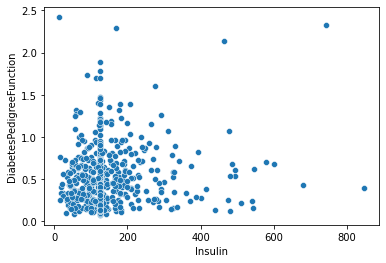

In [21]:
#visualization part start
#scatterplot to show 1 column directly against another column
sns.scatterplot(x='Insulin',y='DiabetesPedigreeFunction',data=df)

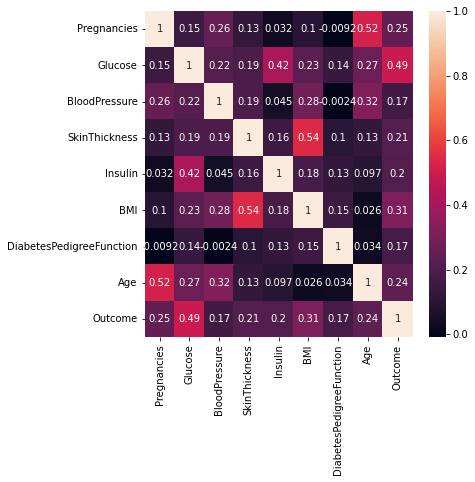

In [22]:
#correlation 


data_corr=df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(data_corr,annot=True)
plt.show()

<AxesSubplot:ylabel='Outcome'>

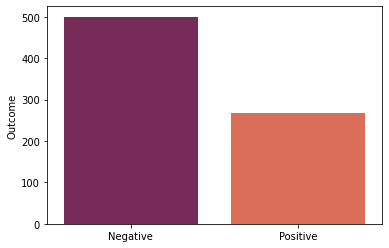

In [ ]:
#distribution of outcome

sns.barplot(x=['Negative','Positive'],y=df.Outcome.value_counts(),palette="rocket")

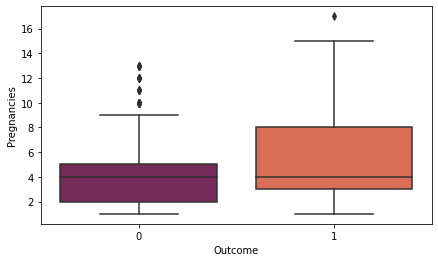

In [ ]:
#outcome with pregnencies distribution
plt.figure(figsize=(7,4))
ax=sns.boxplot(x=df.Outcome, y=df.Pregnancies, data=df,palette="rocket")
plt.show()


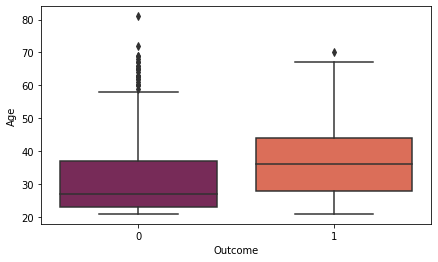

In [ ]:
#outcome with age distribution
plt.figure(figsize=(7,4))
ax=sns.boxplot(x=df.Outcome, y=df.Age, data=df,palette="rocket")
plt.show()

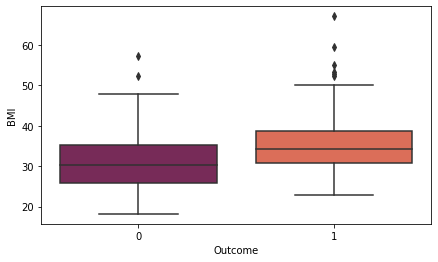

In [ ]:
#outcome with BMI distribution
plt.figure(figsize=(7,4))
ax=sns.boxplot(x=df.Outcome, y=df.BMI, data=df,palette="rocket")
plt.show()

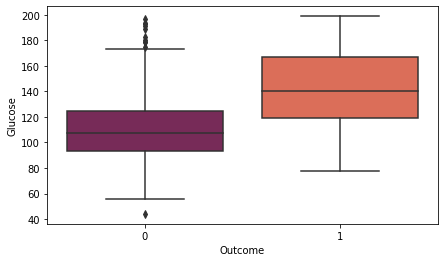

In [ ]:
#outcome with Glucose distribution
plt.figure(figsize=(7,4))
ax=sns.boxplot(x=df.Outcome, y=df.Glucose, data=df,palette="rocket")
plt.show()

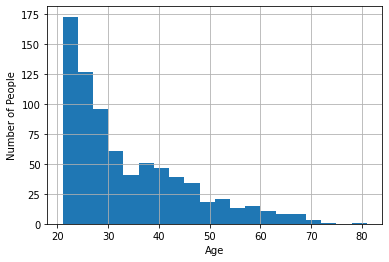

In [ ]:
#age vs number of people in that age range 
table = df.Age.hist(bins=20)
table.set_xlabel("Age")
table.set_ylabel("Number of People")
plt.show()

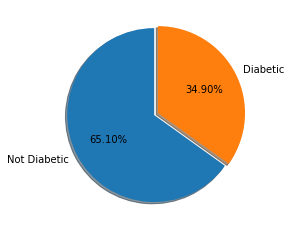

In [ ]:
#diabates posetive negetive in short


explode = (0.0, 0.05)
plt.pie([list(out_train).count(0) + list(out_test).count(0), list(out_train).count(1) + list(out_test).count(1)], labels = ["Not Diabetic","Diabetic"], autopct='%1.2f%%', startangle=90, explode=explode, shadow=True)
plt.show()

In [ ]:
#split on 2 part not 4 parts and than histogram
train, test = train_test_split(df, test_size=0.25)

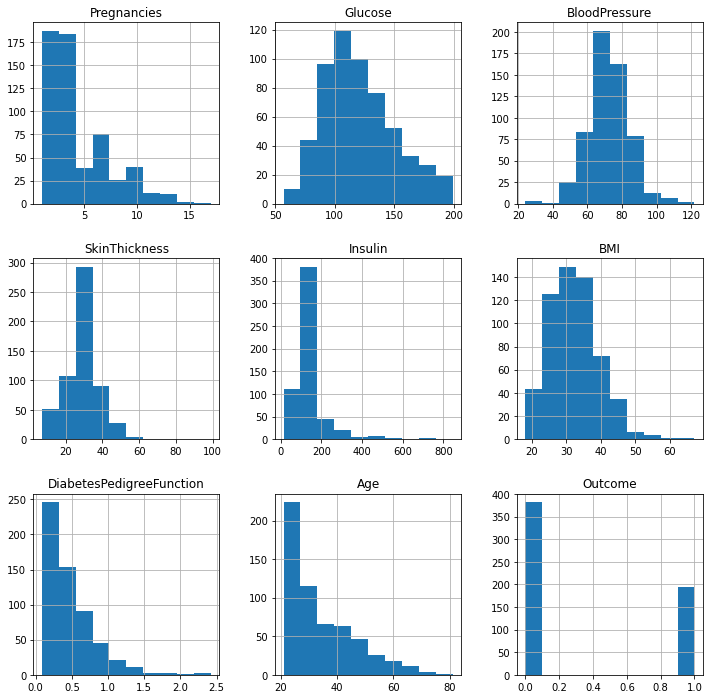

In [ ]:
#check with train data

train.hist(figsize = (12,12))
plt.show()

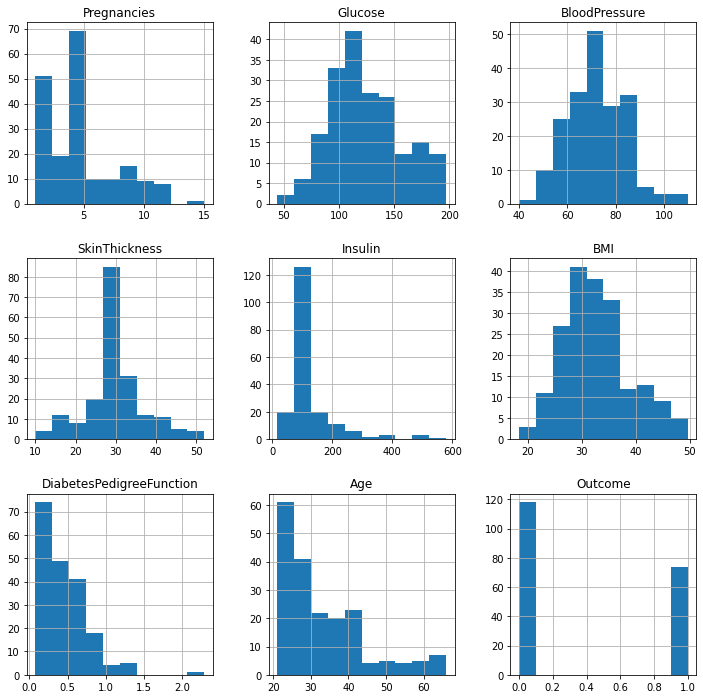

In [ ]:
#check with test data

test.hist(figsize = (12,12))
plt.show()